# Moon data and  SVM
There are numerous varieties of kernels. Below is an example of a view.
We will use these kernels to classify the lunar data and discuss the differences.

- Linear Kernel:
The linear kernel is the most basic kernel function and is used for linear classification. It depicts the dot product of the input features, resulting in the computation of a linear decision boundary.

- Polynomial Kernel:
The input features are transformed into polynomial combinations of the original features using the polynomial kernel. Nonlinearity is introduced to capture more complex decision limits. Degree is a parameter in the kernel that regulates the degree of the polynomial.

- Radial Basis Function (RBF) Kernel:
The Gaussian kernel, often known as the RBF kernel, is a popular choice for SVC. It compares the similarity of data points using a radial basis function. The kernel features a parameter called gamma that controls the influence of individual training samples. Higher gamma values result in a more complicated decision boundary.


In [1]:
from sklearn.datasets import make_moons
import sklearn.svm as svm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X,y = make_moons(n_samples=100)

# Getting the valeus from every kernel

In [ ]:
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# Prep for the plotting

In [ ]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


# plotting

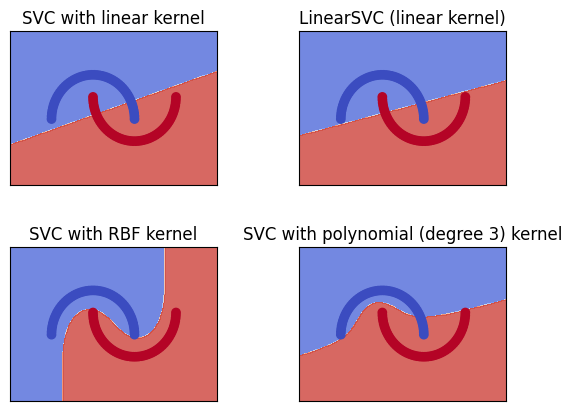

In [3]:

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()   

# Conclusion
According to the graph, the RBF and polynomial kernel are the best in classifying data.
The reason for this is that, as previously indicated, RBF kernels have a radial basis function. The kernel includes a gamma parameter that regulates the impact of individual training data. This greatly improves classification. Depending on the degree, the polynomail will be accurate. In this situation, we used 3, which resulted in good accuracy; however, a greater polynomail, such as 4, may be better, but it may also over predict. 
The linear models are simple, and the results reflect this. They are not very excellent at classification. 